In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [13]:
df=pd.read_csv("kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
import zipfile
with zipfile.ZipFile("/archive.zip","r") as zip_ref:
  zip_ref.extractall("/")

<ipython-input-11-521825864e7d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, annot = True)


Text(0.5, 1.0, '')

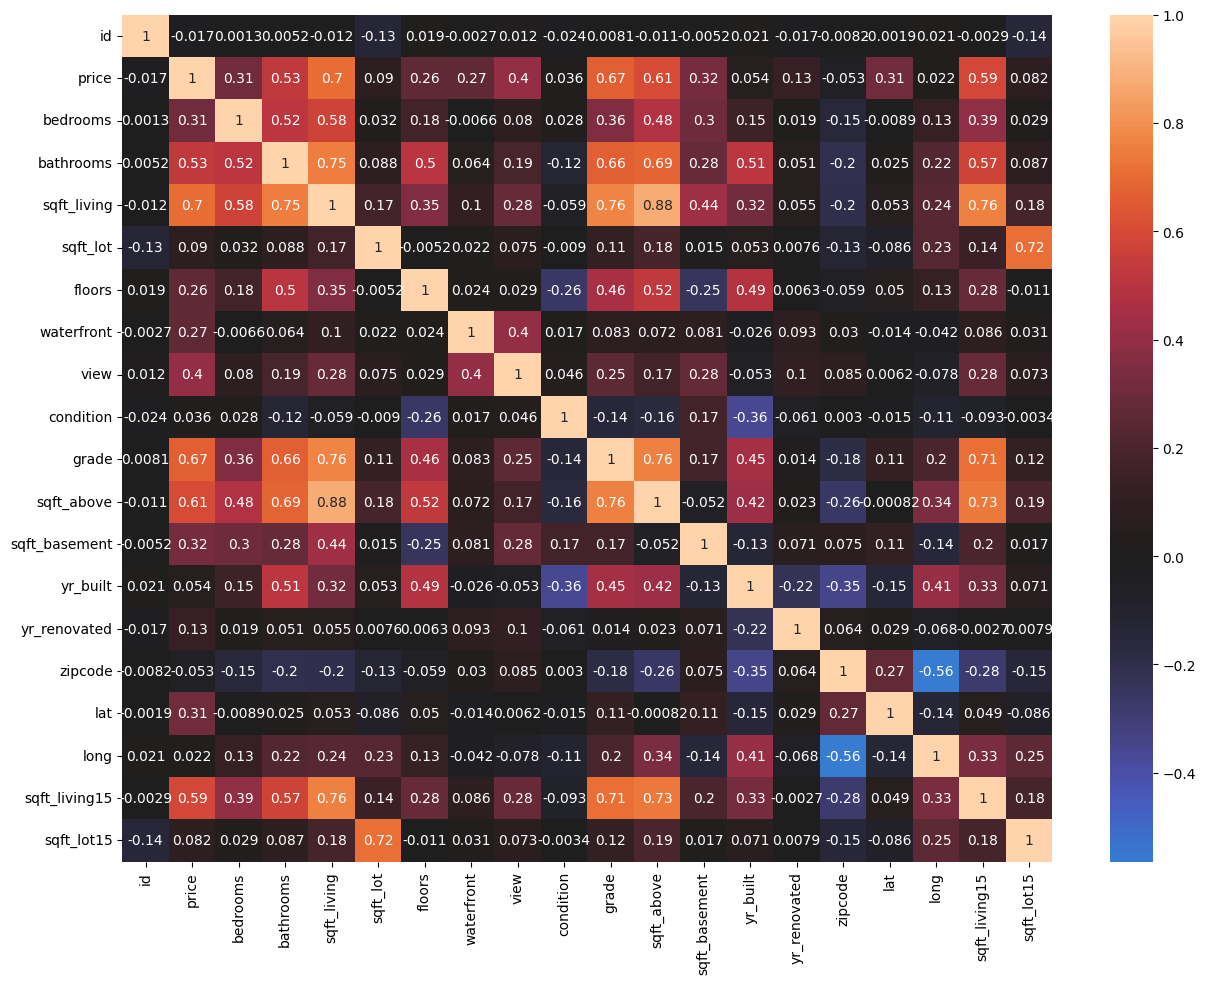

In [11]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), center=0, annot = True)

plt.title('', fontsize=15)

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y = np.array(df['price'])
x=df[['bedrooms',"bathrooms", "sqft_living" , "sqft_lot", "floors", "waterfront","view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w0

2872976.3074809457

In [16]:
model.coef_

array([-3.29396147e+04,  4.93999678e+04,  1.04625701e+02,  8.06403904e-02,
        5.21982233e+03,  5.82507045e+05,  5.05954848e+04,  2.62037956e+04,
        1.00267068e+05,  6.86283594e+01,  3.59973421e+01, -2.71487482e+03,
        2.17159038e+01, -5.51008685e+02,  6.03013924e+05, -2.21805139e+05,
        2.47882879e+01, -3.19313881e-01])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 123995.86798058594
Mean Squared Error: 38664720382.83767
R2 score: 0.6887432239603325


In [19]:
mmsc = MinMaxScaler()
x_norm = mmsc.fit_transform(X_train)
x_norm_test = mmsc.fit_transform(X_test)
model = LinearRegression()
model.fit(x_norm, y_train)
model.coef_


array([-1087007.28458279,   395199.74254876,   830673.41692836,
         133124.30142629,    13049.55582489,   582507.04474764,
         202381.93924507,   104815.18223866,  1203204.81866025,
        1008322.95433509,   375626.02298024,  -312210.60378688,
          43757.54611894,  -109099.71963857,   374893.75637341,
        -266166.1663724 ,   142532.65568357,  -273805.58572621])

In [20]:
y_pred = model.predict(x_norm_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MAE: 273412.52482939593
MSE: 107595482457.3818
R2 score: 0.13384029020464394


WOW!!!!!!
it`s a polnoe govno

In [23]:
from re import S
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_std = std.fit_transform(X_train)
x_std_test= std.fit_transform(X_test)
model = LinearRegression()
model.fit(x_norm, y_train)
model.coef_


array([-1087007.28458279,   395199.74254876,   830673.41692836,
         133124.30142629,    13049.55582489,   582507.04474764,
         202381.93924507,   104815.18223866,  1203204.81866025,
        1008322.95433509,   375626.02298024,  -312210.60378688,
          43757.54611894,  -109099.71963857,   374893.75637341,
        -266166.1663724 ,   142532.65568357,  -273805.58572621])

In [24]:
y_pred = model.predict(x_norm_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MAE: 273412.52482939593
MSE: 107595482457.3818
R2 score: 0.13384029020464394
